# Business Problem
As a Data Mining/Analytic Consultant, you are asked develop a **Customer Segmentation** in such a way that it will be possible for the Marketing Department to **better understand all the different Customers’ Profiles**.
You are expected to **define, describe and explain the clusters you chose**. Invest time in reasoning how you want to do your clustering, possible approaches, and advantages or disadvantages of different decisions.
Simultaneous, you should **express the marketing approach you recommend for each cluster**. 
A credit card company makes money, mainly, if/via:
* Customers don't pay their balance in full every month to avoid interest charges;
* Transaction fees (e.g., cash advance fees);
* Interchange - Every time you use a credit card, the merchant pays a processing fee equal to a percentage of the transaction. The portion of that fee sent to the issuer via the payment network is called “interchange,” and is usually about 1% to 3% of the transaction. These fees are set by payment networks and vary based on the volume and value of transactions.

# Business Understanding

"This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

**CUSTID** : Identification of Credit Card holder

**BALANCE** : Amount left to make purchases.

**BALANCEFREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES** : Amount of purchases made from account

**ONEOFFPURCHASES** : Maximum purchase amount done in one-go

**INSTALLMENTSPURCHASES** : Amount of purchase done in installment

**CASHADVANCE** : Cash in advance given by the user. A cash advance on your credit card is an amount of cash borrowed against your credit limit. It's like withdrawing money from the ATM with your debit card, except the cash comes from your credit limit rather than your bank account balance. That means you have to pay it back with interest.

**PURCHASESFREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not 
frequently purchased)

**ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid

**CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"

**PURCHASESTRX** : Number of purchase transactions made

**CREDITLIMIT** : Maximum amount of credit a financial institution extends to a client

**PAYMENTS** : Amount of Payment done by user

**MINIMUM_PAYMENTS** : Minimum amount of payments made by user. It's the minimum amount of money you need to pay towards your credit card balance each month to avoid a late charge or fee. After 30 days without paying at least the minimum, your account can be reported delinquent and your credit score could also take a hit.

**PRCFULLPAYMENT** : Percent of full payment paid by user?

**TENURE** : Months to pay the debt"

Dataset retirado do Kaggle: https://www.kaggle.com/arjunbhasin2013/ccdata

**Insights**
* Apesar de existirem várias variáveis baseadas na Frequência, não sabemos definir ao certo o que torna alguém Frequente e alguém não-frequente. Precisaríamos de pedir informação sobre o que define alguém considerado frequente de alguém não-frequente.
* Remover as variáveis de frequência é possível? A verdade é que 1 e 0 não diz muito a um modelo.

In [162]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import shutil
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests
import sklearn as sc
from zipfile import ZipFile
import category_encoders as ce
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import collections
from scipy import stats
import matplotlib.ticker as mtick
import category_encoders as ce
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [163]:
df = pd.read_csv('CC GENERAL.csv', encoding='utf-8')

#(file, delimiter = ";")

In [164]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [165]:
# Analisar primeiras 5 linhas
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [166]:
# Passar a coluna CUST_ID para o índex da tabela
df.set_index("CUST_ID", inplace = True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Understanding

In [167]:
# Análise da tabela
n_rows, n_columns = df.shape
print("O dataset tem {} Linhas e {} Colunas.".format(n_rows, n_columns))

O dataset tem 8950 Linhas e 17 Colunas.


In [168]:
# Descrição dos dados
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

**Insights**
* Não há variáveis categóricas.

In [169]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Insights**
* Apenas **_Balance Frequency_ , _Purchases_Frequency_ , _PRC_Full_Payment_ e _Tenure_** têm um valor na média e mediana semelhantes. Será preciso fazer alguma transformação para ter uma distribuição mais normal.
* As variáveis de frequêcia já devem estar normalizadas.
* Standard deviation grande em várias variáveis.
* Poucas variáveis com missing values.
* As variáveis relacionadas com **_PURCHASES_** têm um máximo superior ao **_BALANCE_**. Tem sentido? O que significa?

In [170]:
# Análise de todos os valores únicos na base de dados para tentar encontrar valores estranhos
for col in df:
    print(df[col].unique())

[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]
[  95.4     0.    773.17 ...  291.12  144.4  1093.25]
[   0.    773.17 1499.   ...  734.4  1012.73 1093.25]
[  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]
[   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008]
[0.166667 0.       1.       0.083333 0.666667 0.333333 0.25     0.75
 0.5      0.416667 0.916667 0.583333 0.375    0.625    0.272727 0.833333
 0.909091 0.111111 0.142857 0.090909 0.363636 0.1      0.875    0.125
 0.818182 0.636364 0.2      0.8      0.3      0.9      0.285714 0.727273
 0.181818 

**Insights**
* Não há valores estranhos. Apenas missing values.

In [171]:
# Número de Missing Values por Variável
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [172]:
# Percentagem dos missing values por variável
df.isna().sum()/df.shape[0]*100

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

**Insights**
* Poucas variáveis com missing values. As que têm, têm poucos valores em falta.

### Análise Visual

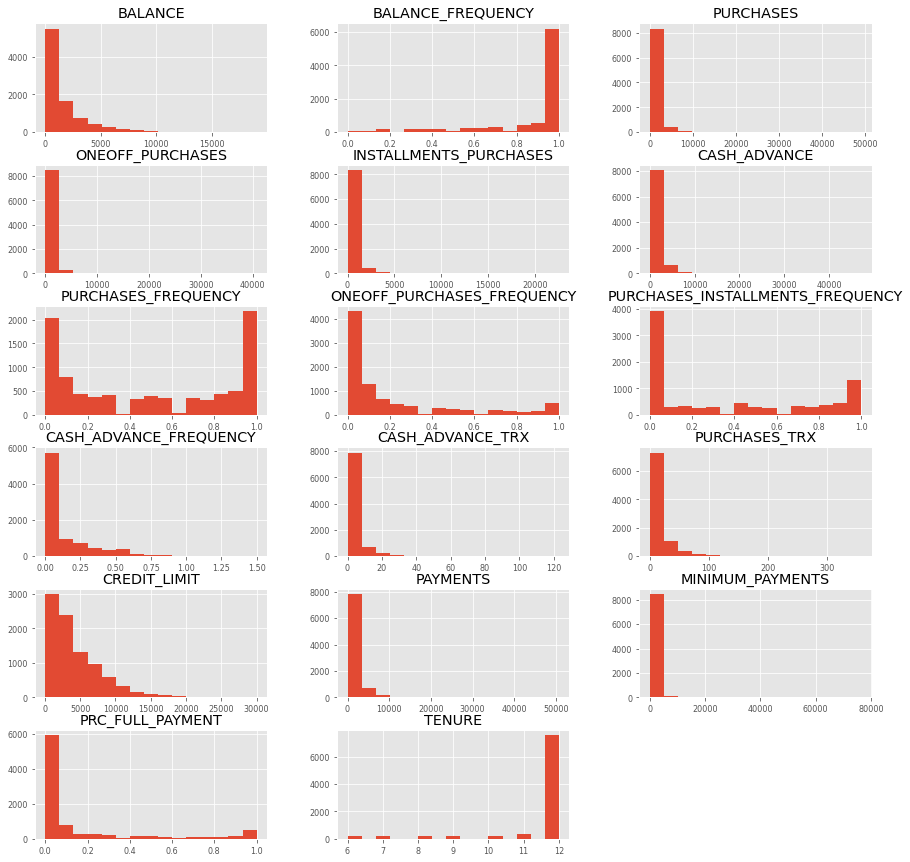

In [173]:
# Do histograms on all numeric variables
numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=15, figsize=(15, 15), layout=(6, 3), xlabelsize=8, ylabelsize=8);

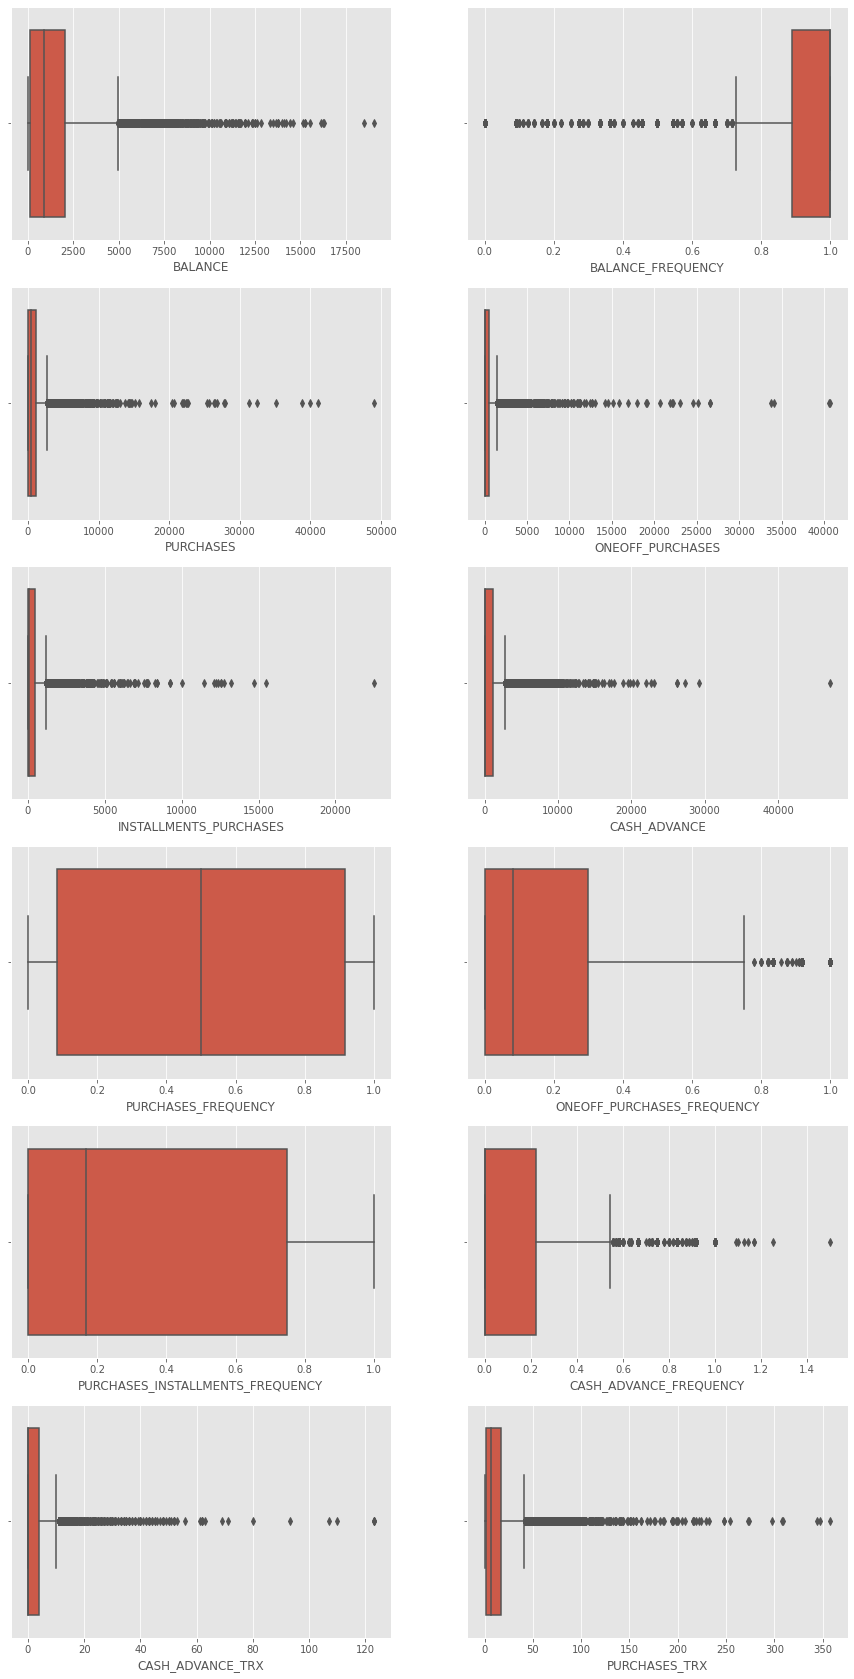

In [174]:
# Do boxplots on all numeric variables
fig, ax = plt.subplots(6, 2, figsize=(15, 30))
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

**Insights**
* Apenas 2 variáveis não têm o que podem, à partida, ser considerados outliers.
* Quase não há distribuições normais.
* O que significam os valores de _Tenure_

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

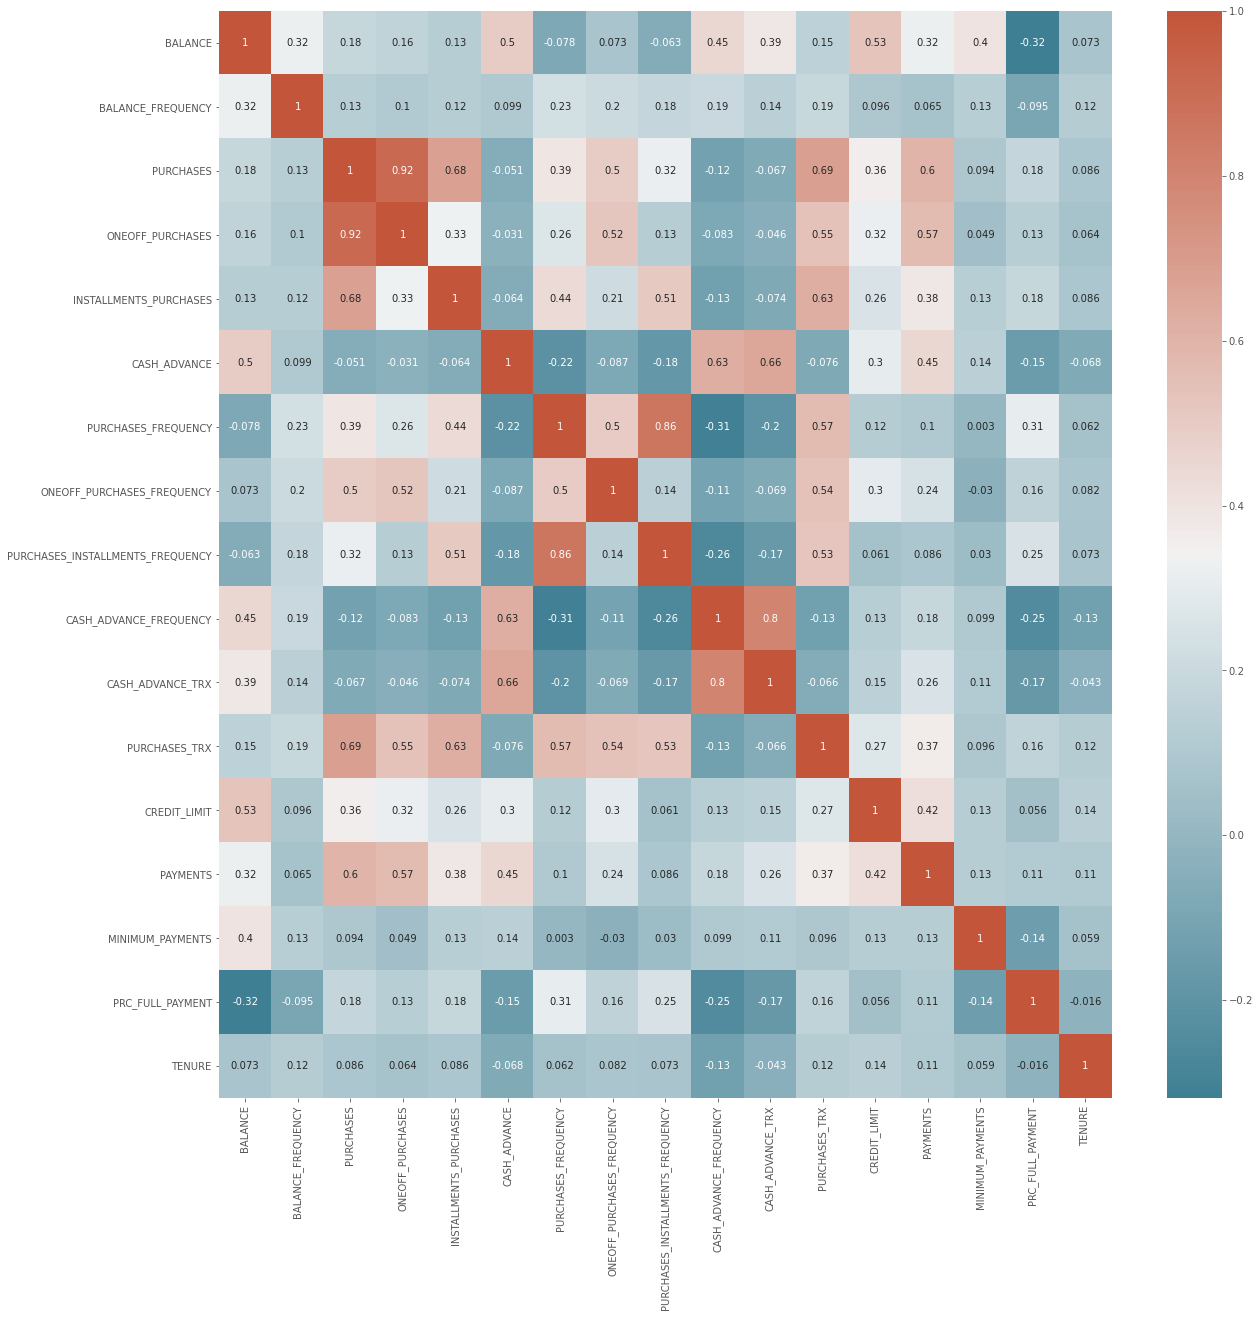

In [176]:
# Análise da correlação entre variáveis

cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = cmap)
plt.show()

**Insights**
* Alta correlação entre _Purchases_ e _Oneoff_Purchases_ e entre _Purchases_Frequency_ e _Purchases_Installments_Frequency_. Será preciso remover 2 destas variáveis para evitar multicolinearidade.

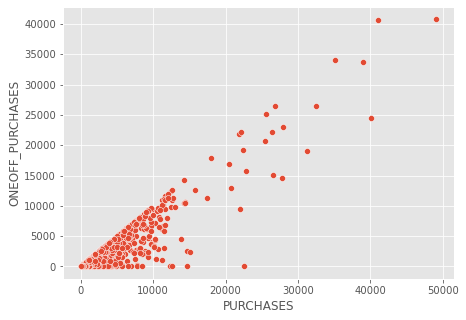

In [177]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = "PURCHASES", y = "ONEOFF_PURCHASES")
plt.show()

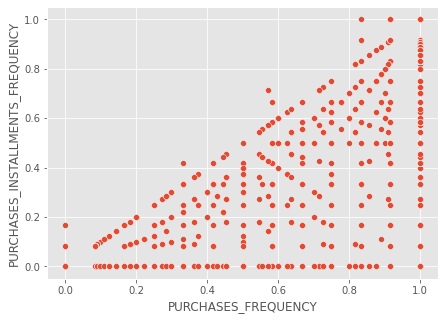

In [178]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = "PURCHASES_FREQUENCY", y = "PURCHASES_INSTALLMENTS_FREQUENCY")
plt.show()

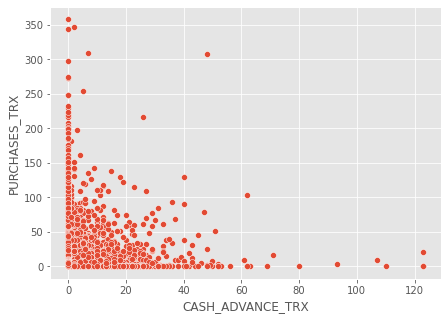

In [179]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = "CASH_ADVANCE_TRX", y = "PURCHASES_TRX")
plt.show()

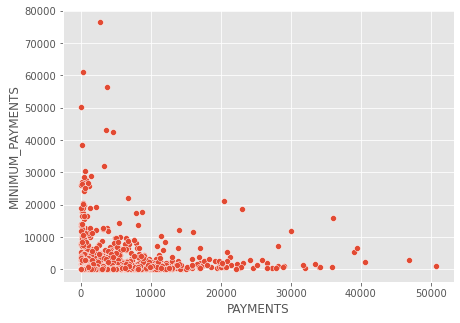

In [180]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = "PAYMENTS", y = "MINIMUM_PAYMENTS")
plt.show()

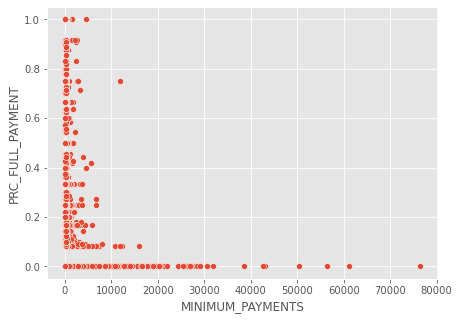

In [181]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = "MINIMUM_PAYMENTS", y = "PRC_FULL_PAYMENT")
plt.show()

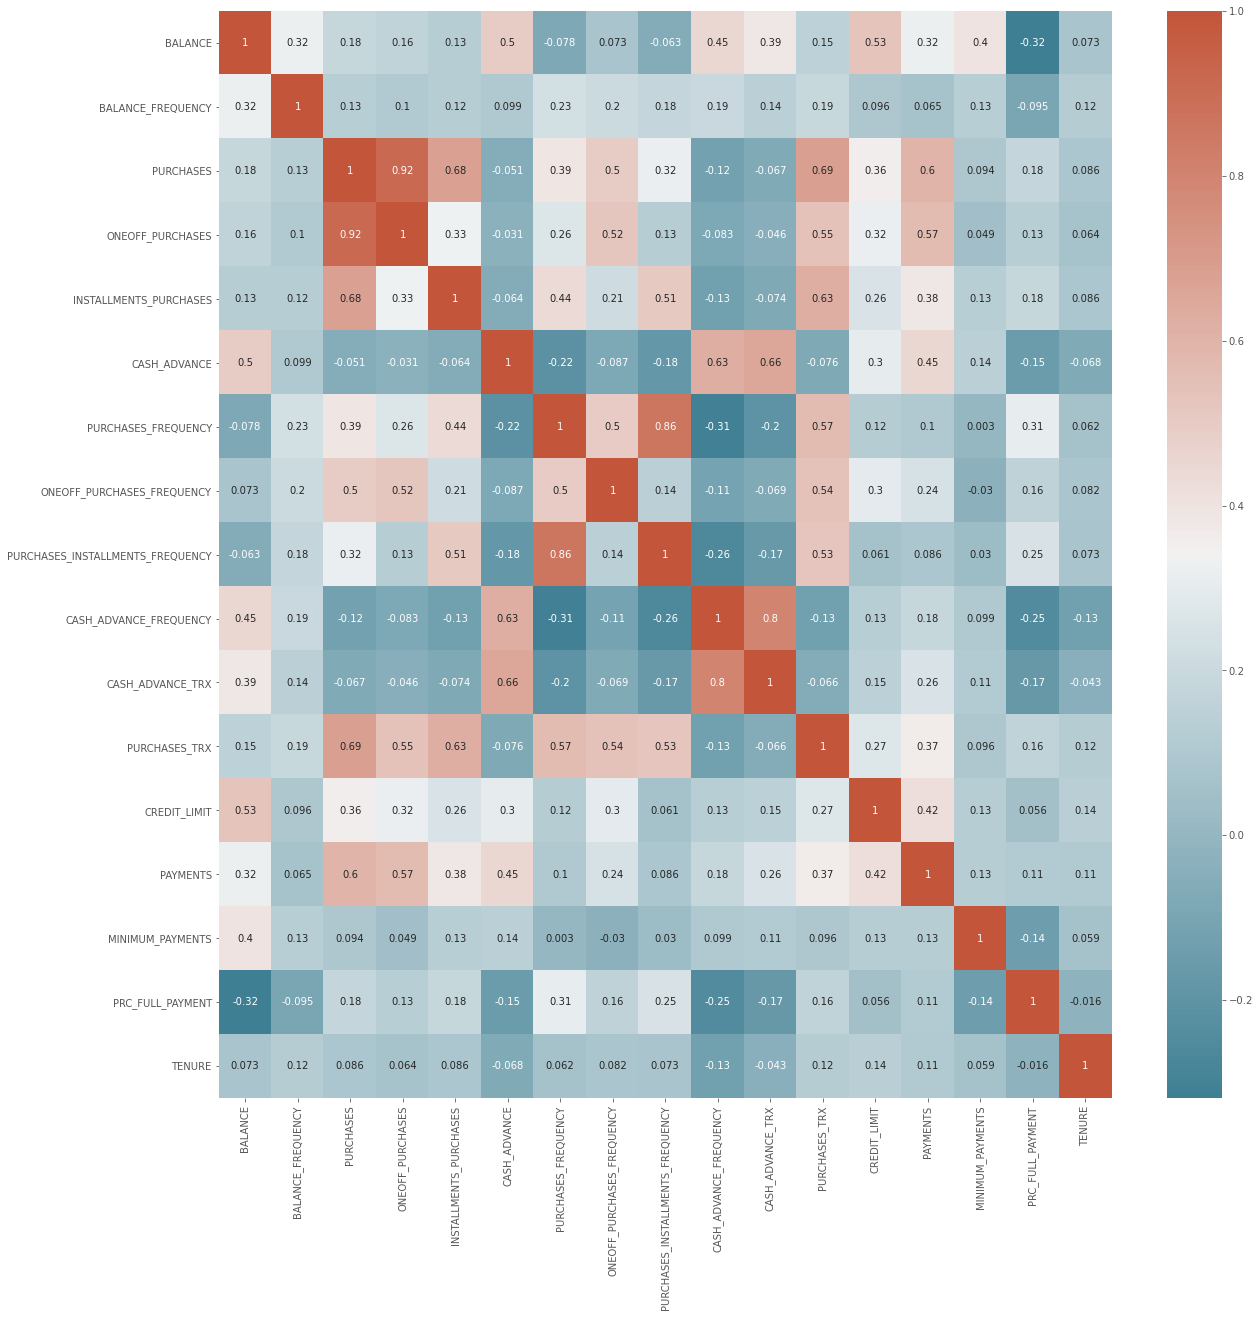

In [182]:
# Análise da correlação entre variáveis

cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = cmap)
plt.show()

# Data Preparation
* Missing Values
* Feature Engineering
* Outliers
* Drop Correlated Features
* Normalization (PCA & Data Reduction?)

In [183]:
# Cópia do dataframe pré-tratamento
X = df.copy(deep=True)

## Missing Values

**_CREDIT_LIMIT_** tem 0.01% de dados em falta e **_MINIMUM_PAYMENTS_** tem 3,5% de dados em falta. Removem-se os valores em falta.

In [184]:
# Remoção todos os missing values
X.dropna(inplace=True)

In [185]:
# Confirmação de que já não há missing values
X.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [186]:
n_rows, n_columns = X.shape
print("O dataset tem {} Linhas e {} Colunas.".format(n_rows, n_columns))

O dataset tem 8636 Linhas e 17 Colunas.


In [187]:
# Preenchimento dos campos NaN com 0. Estes existem porque um dos valores na equação era 0. O resultado tem sentido.
X.fillna(0, inplace = True)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


## Feature Engineering
* 1 FEE APPLIED -> Quando a pessoa não paga o minimum payment

In [188]:
X['Fee_Applied'] = X['MINIMUM_PAYMENTS'] - X['PAYMENTS']
X.loc[X['Fee_Applied'] > 0, 'Fee_Applied?'] = 1
X['Fee_Applied?'].fillna(0, inplace = True)
X.drop(['Fee_Applied'], axis=1, inplace = True)

* 2 Frequency -> Frequencia Mensal de Transações = PURCHASES_TRX + CASH_ADVANCE_TRX a dividir pelos 6 meses

In [189]:
X['FREQ'] = (X['PURCHASES_TRX'] + X['CASH_ADVANCE_TRX']) / 6

* 3 Monetary -> INSTALLMENTSPURCHASES + CASHADVANCE

In [190]:
X['MON'] = X['INSTALLMENTS_PURCHASES'] + X['CASH_ADVANCE']

* 4 AVG_MONTH_SPENDING: valor médio mensal que o cliente tem de pagar. AVG_MONTH_SPENDING = PURCHASES + CASH_ADVANCE/6.

In [191]:
X['AVG_MONTH_SPENDING'] = (X['PURCHASES'] + X['CASH_ADVANCE'])/6

* 5 AVG_MONTH_PURCHASES: valor médio mensal que o cliente gasta em compras. AVG_MONTH_PURCHASES = PURCHASES/6.

In [192]:
X['AVG_MONTH_PURCHASES'] = X['PURCHASES']/6

* 7 RATIO_INSTALLMENTS_PURCHASES: corresponde ao peso de INSTALLMENTS_PURCHASES em todas as compras do cliente. RATIO_INSTALLMENTS_PURCHASES  = INSTALLMENTS_PURCHASES/PURCHASES.

In [193]:
X['RATIO_INSTALLMENTS_PURCHASES'] = X['INSTALLMENTS_PURCHASES']/X['PURCHASES']


#Se não houver INSTALLMENTS_PURCHASES = 0
X['RATIO_INSTALLMENTS_PURCHASES'].fillna(0, inplace = True)

##If happen  X['INSTALLMENTS_PURCHASES'] > X['PURCHASES'] = Wrong Values 
dropped_dataset_2 = (X[X['INSTALLMENTS_PURCHASES'] - X['PURCHASES'] > 1])
X = X[X['INSTALLMENTS_PURCHASES'] - X['PURCHASES'] < 1]

#Descrição das observações que eliminámos
#dropped_dataset_2.describe().transpose()

In [194]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8622.0,1601.620688,2094.672139,0.000000,148.566319,917.246633,2106.287542,19043.138560
BALANCE_FREQUENCY,8622.0,0.895170,0.207513,0.000000,0.909091,1.000000,1.000000,1.000000
PURCHASES,8622.0,1025.937711,2168.114311,0.000000,43.262500,375.235000,1146.585000,49039.570000
ONEOFF_PURCHASES,8622.0,605.883649,1685.498309,0.000000,0.000000,45.650000,600.000000,40761.250000
INSTALLMENTS_PURCHASES,8622.0,420.110292,915.792010,0.000000,0.000000,94.180000,480.345000,22500.000000
CASH_ADVANCE,8622.0,995.225635,2122.509671,0.000000,0.000000,0.000000,1134.734475,47137.211760
PURCHASES_FREQUENCY,8622.0,0.495873,0.401313,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8622.0,0.206243,0.300182,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8622.0,0.368502,0.398093,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8622.0,0.137750,0.201880,0.000000,0.000000,0.000000,0.250000,1.500000


* 8 CASH_ADVANCE_TRX_MONTH: valor médio mensal de adiantamentos (i.e., CASH_ADVANCE). CASH_ADVANCE_TRX_MONTH = CASH_ADVANCE_TRX/6 

In [195]:
X['CASH_ADVANCE_TRX_MONTH'] = X['CASH_ADVANCE_TRX']/6

* 9 PURCHASES_TRX_MONTH: número médio mensal de compras. PURCHASES_TRX_MONTH = PURCHASES_TRX/6

In [196]:
X['PURCHASES_TRX_MONTH'] = X['PURCHASES_TRX']/6

In [197]:
X.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Fee_Applied?                        0
FREQ                                0
MON                                 0
AVG_MONTH_SPENDING                  0
AVG_MONTH_PURCHASES                 0
RATIO_INSTALLMENTS_PURCHASES        0
CASH_ADVANCE_TRX_MONTH              0
PURCHASES_TRX_MONTH                 0
dtype: int64

In [198]:
#Inputting Missing values in RATIO_ONEOFF_PURCHASES como zero. Porque quando é missing value quer dizer que oneoff é = 0

X.fillna(0, inplace = True)

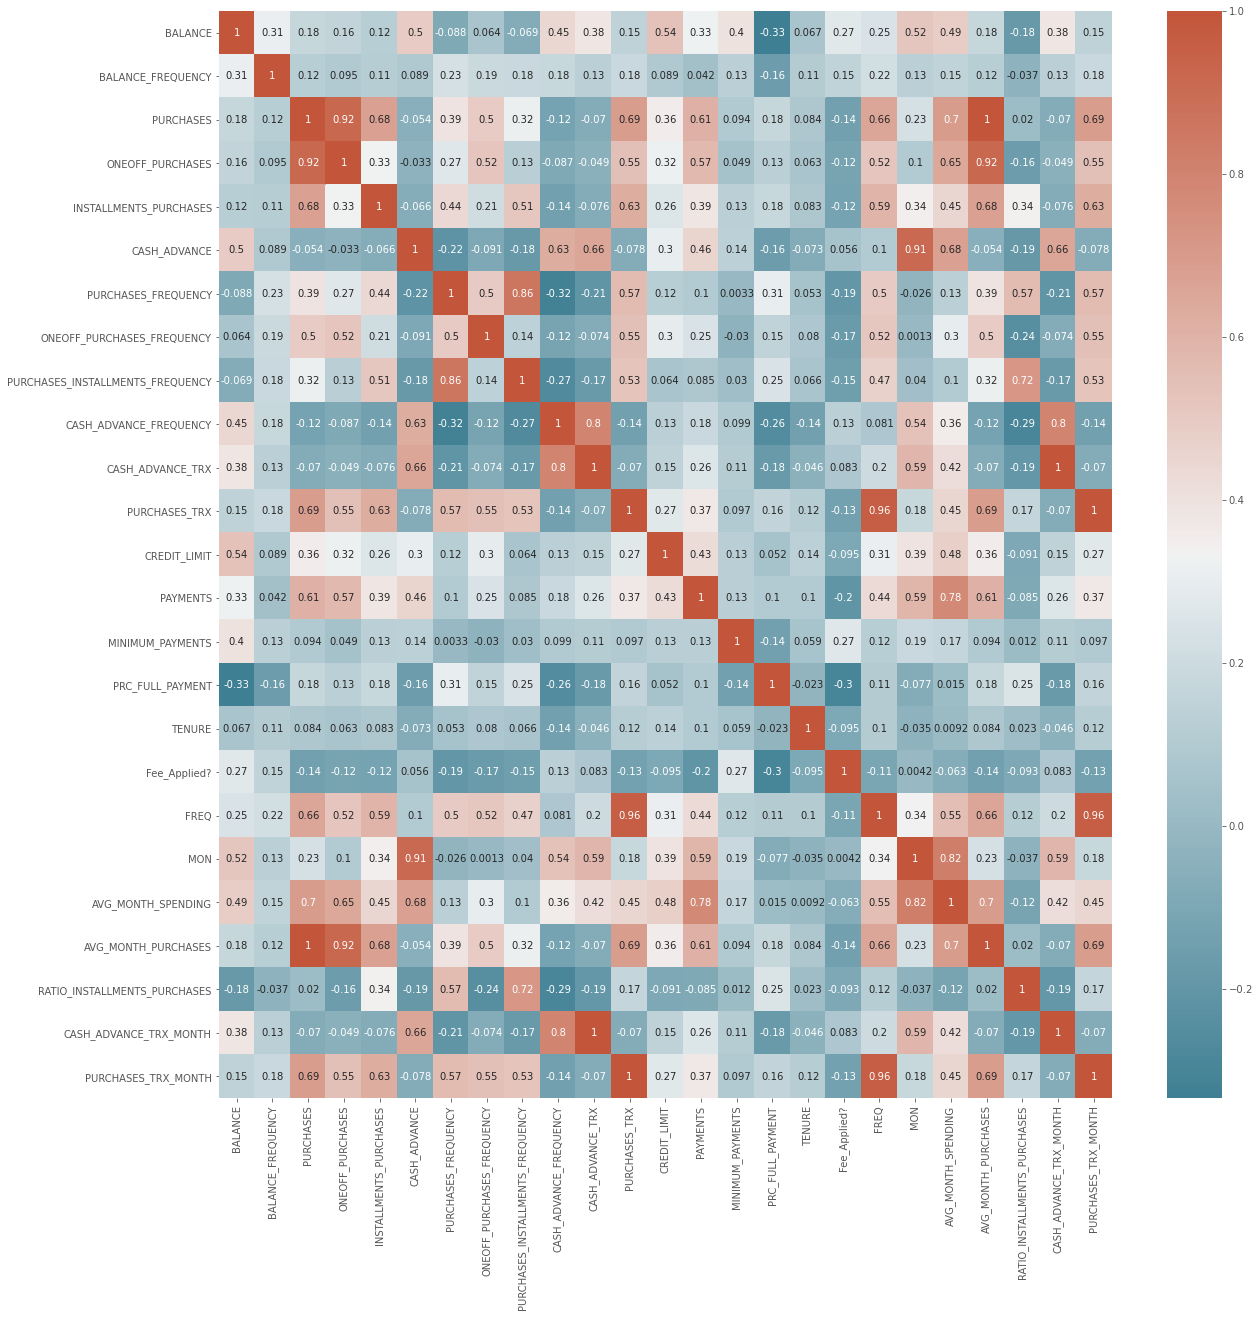

In [199]:
# Análise da correlação entre variáveis

cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize = (20,20))
sns.heatmap(X.corr(), annot = True, cmap = cmap)
plt.show()

In [200]:
dataCorr = X.corr()
dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))

correlation_mat = dataCorr

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.75 ]

strong_pairs2 = sorted_pairs[abs(sorted_pairs) < -0.75 ]

print(strong_pairs, strong_pairs2)

AVG_MONTH_SPENDING                PAYMENTS                  0.780677
CASH_ADVANCE_TRX_MONTH            CASH_ADVANCE_FREQUENCY    0.799563
CASH_ADVANCE_TRX                  CASH_ADVANCE_FREQUENCY    0.799563
AVG_MONTH_SPENDING                MON                       0.822991
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY       0.862246
MON                               CASH_ADVANCE              0.914263
AVG_MONTH_PURCHASES               ONEOFF_PURCHASES          0.917111
ONEOFF_PURCHASES                  PURCHASES                 0.917111
FREQ                              PURCHASES_TRX             0.963131
PURCHASES_TRX_MONTH               FREQ                      0.963131
                                  PURCHASES_TRX             1.000000
AVG_MONTH_PURCHASES               PURCHASES                 1.000000
CASH_ADVANCE_TRX_MONTH            CASH_ADVANCE_TRX          1.000000
dtype: float64 Series([], dtype: float64)


## Outliers

* "If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric." - https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241


* Muitas variáveis neste dataset têm zeros, pelo que não dará para transformar os dados através de transformações log ou boxcox. Ainda assim, é possível diminuir a skewness dos dados através da Square Root Transformation ou Log1p. Tendo em conta a informação acima, o objetivo passa por ter valores de skewness entre -0.5 e 0.5. Nas que for possível a transformação log ou boxcox fá-las-emos.

Apoio: 
* https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45
* https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/
* https://stackoverflow.com/questions/65982059/is-log1p-the-correct-way-of-doing-log-scale-transformation-of-charts
* https://discuss.analyticsvidhya.com/t/methods-to-deal-with-zero-values-while-performing-log-transformation-of-variable/2431/2

In [201]:
# Summary statistics for all variables
summary=X.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,mean,std,min,25%,50%,75%,max
BALANCE,8622.0,1601.620688,2094.672139,0.000000,148.566319,917.246633,2106.287542,19043.138560
BALANCE_FREQUENCY,8622.0,0.895170,0.207513,0.000000,0.909091,1.000000,1.000000,1.000000
PURCHASES,8622.0,1025.937711,2168.114311,0.000000,43.262500,375.235000,1146.585000,49039.570000
ONEOFF_PURCHASES,8622.0,605.883649,1685.498309,0.000000,0.000000,45.650000,600.000000,40761.250000
INSTALLMENTS_PURCHASES,8622.0,420.110292,915.792010,0.000000,0.000000,94.180000,480.345000,22500.000000
CASH_ADVANCE,8622.0,995.225635,2122.509671,0.000000,0.000000,0.000000,1134.734475,47137.211760
PURCHASES_FREQUENCY,8622.0,0.495873,0.401313,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8622.0,0.206243,0.300182,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8622.0,0.368502,0.398093,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8622.0,0.137750,0.201880,0.000000,0.000000,0.000000,0.250000,1.500000


In [202]:
#Safe

XPrelog = X.copy()

· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed

In [203]:
left_skew = []
right_skew = []
normal_dist = []

for i in X.columns:
    if X[i].skew() > 0.5:
        right_skew.append(i)
        print(i,X[i].skew())
    if X[i].skew() < -0.5:
        left_skew.append(i)
        print(i,X[i].skew())
    if X[i].skew() >= -0.5 and X[i].skew() <= 0.5:
        normal_dist.append(i)
        print(i,X[i].skew())

BALANCE 2.372792658187148
BALANCE_FREQUENCY -2.086715401682763
PURCHASES 8.0559014438323
ONEOFF_PURCHASES 9.929168346702639
INSTALLMENTS_PURCHASES 7.235107243654545
CASH_ADVANCE 5.138468197209307
PURCHASES_FREQUENCY 0.03359970510114902
ONEOFF_PURCHASES_FREQUENCY 1.501922752666951
PURCHASES_INSTALLMENTS_FREQUENCY 0.4890342817019814
CASH_ADVANCE_FREQUENCY 1.7945783739761305
CASH_ADVANCE_TRX 5.669712080601016
PURCHASES_TRX 4.581683165739265
CREDIT_LIMIT 1.5072139616128495
PAYMENTS 5.868525886995757
MINIMUM_PAYMENTS 13.621631197593615
PRC_FULL_PAYMENT 1.8874914961458602
TENURE -3.0129309865369103
Fee_Applied? 1.0158514356060457
FREQ 4.451160751544029
MON 4.73442635193508
AVG_MONTH_SPENDING 5.096218803128207
AVG_MONTH_PURCHASES 8.055901443832301
RATIO_INSTALLMENTS_PURCHASES 0.4560192231728301
CASH_ADVANCE_TRX_MONTH 5.669712080601018
PURCHASES_TRX_MONTH 4.581683165739265


In [204]:
normal_dist

['PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'RATIO_INSTALLMENTS_PURCHASES']

In [205]:
left_skew

['BALANCE_FREQUENCY', 'TENURE']

In [206]:
right_skew

['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'ONEOFF_PURCHASES_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'Fee_Applied?',
 'FREQ',
 'MON',
 'AVG_MONTH_SPENDING',
 'AVG_MONTH_PURCHASES',
 'CASH_ADVANCE_TRX_MONTH',
 'PURCHASES_TRX_MONTH']

#### Copia DF pré transformação

In [207]:
Z = X.copy()

In [208]:
Y = X.copy()

###### Ver o que funciona melhor para right skewed

In [209]:
#LOG 10

#como tem valores zero apliquei +1

Z[right_skew]=np.log10(Z[right_skew]+1)

In [210]:
#Square Root

Y[right_skew] = np.sqrt(Y[right_skew])

Skewness original:  2.393386042571806 Skewness Log10:  -0.7772648687130507 Skewness SR:  0.825852816141394
Skewness original:  -2.0232655185149078 Skewness Log10:  -2.086715401682763 Skewness SR:  -2.086715401682763
Skewness original:  8.144269064554651 Skewness Log10:  -0.7770665137356072 Skewness SR:  1.7140715920505056
Skewness original:  10.045082884700278 Skewness Log10:  0.16544256623718975 Skewness SR:  2.1151189218245836
Skewness original:  7.299119908745641 Skewness Log10:  -0.03977611306488581 Skewness SR:  1.5260350281288253
Skewness original:  5.1666090740747235 Skewness Log10:  0.24635042602182355 Skewness SR:  1.4766074150436568
Skewness original:  0.0601642358580359 Skewness Log10:  0.03359970510114902 Skewness SR:  0.03359970510114902
Skewness original:  1.5356127835248519 Skewness Log10:  1.258436594704919 Skewness SR:  0.6993222512859466
Skewness original:  0.5092011649999882 Skewness Log10:  0.4890342817019814 Skewness SR:  0.4890342817019814
Skewness original:  1.82

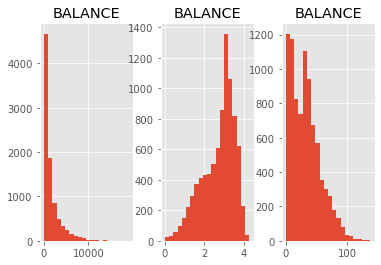

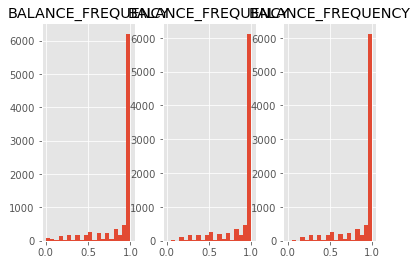

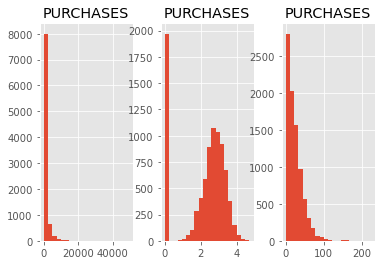

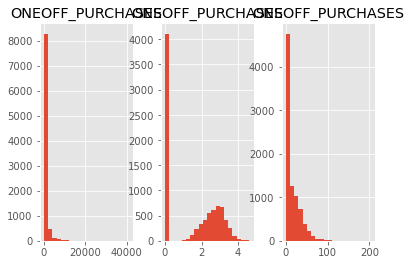

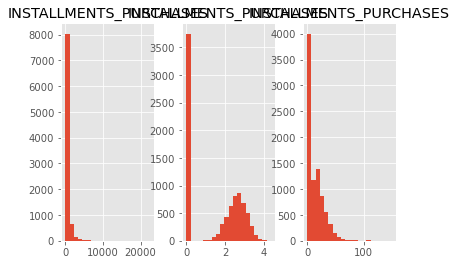

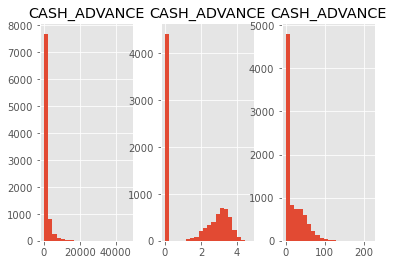

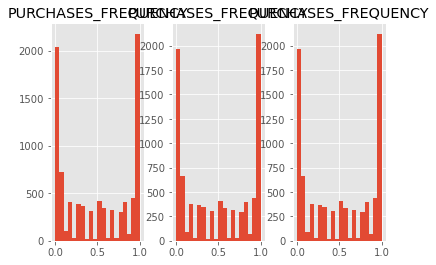

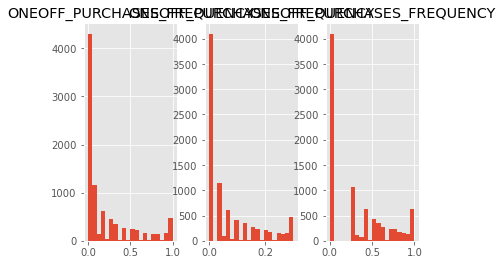

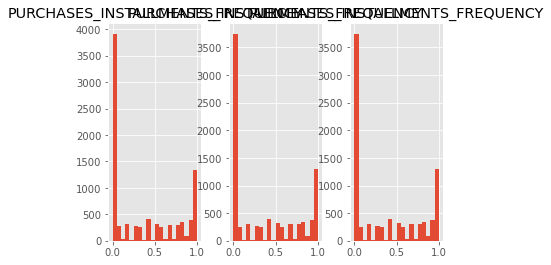

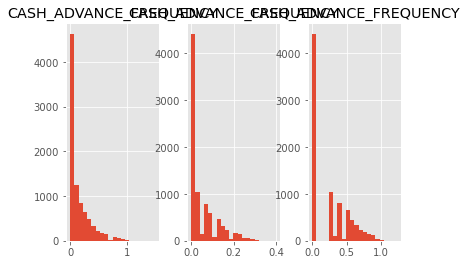

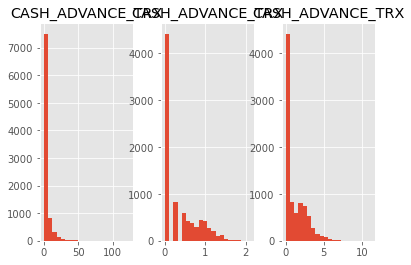

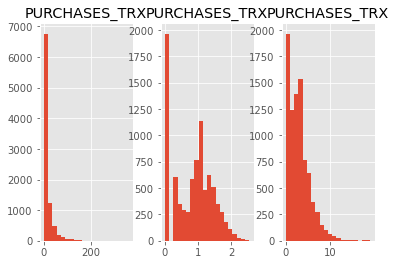

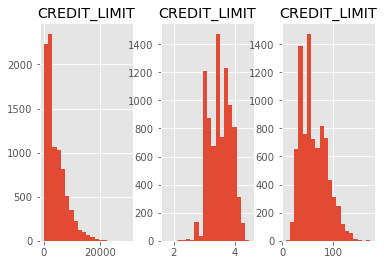

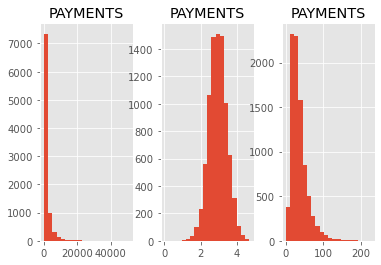

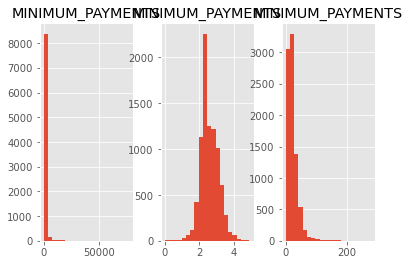

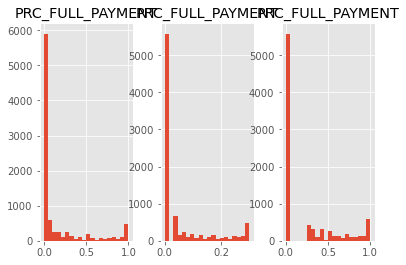

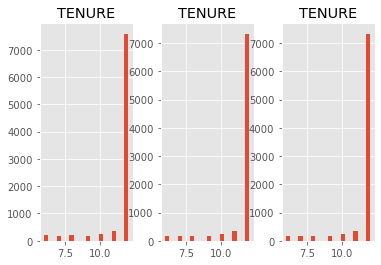

In [211]:
for i in df.columns:
    print("Skewness original: ",df[i].skew(), "Skewness Log10: ",Z[i].skew(), "Skewness SR: ",Y[i].skew())
    fig, axes = plt.subplots(1, 3)
    df.hist(i, bins=20, ax=axes[0])
    Z.hist(i, bins=20, ax=axes[1])
    Y.hist(i, bins=20, ax=axes[2])

#### APPLY TRANFORMATION

In [212]:
#Square Root

X[left_skew] = np.sqrt(Y[left_skew])

In [213]:
#Log 10

X[right_skew]=np.log10(X[right_skew]+1)

BALANCE Skewness original:  2.393386042571806 New Skewness:  -0.7772648687130507
BALANCE_FREQUENCY Skewness original:  -2.0232655185149078 New Skewness:  -2.5279781448234644
PURCHASES Skewness original:  8.144269064554651 New Skewness:  -0.7770665137356072
ONEOFF_PURCHASES Skewness original:  10.045082884700278 New Skewness:  0.16544256623718975
INSTALLMENTS_PURCHASES Skewness original:  7.299119908745641 New Skewness:  -0.03977611306488581
CASH_ADVANCE Skewness original:  5.1666090740747235 New Skewness:  0.24635042602182355
PURCHASES_FREQUENCY Skewness original:  0.0601642358580359 New Skewness:  0.03359970510114902
ONEOFF_PURCHASES_FREQUENCY Skewness original:  1.5356127835248519 New Skewness:  1.258436594704919
PURCHASES_INSTALLMENTS_FREQUENCY Skewness original:  0.5092011649999882 New Skewness:  0.4890342817019814
CASH_ADVANCE_FREQUENCY Skewness original:  1.828686266477852 New Skewness:  1.424669247871028
CASH_ADVANCE_TRX Skewness original:  5.721298203192298 New Skewness:  0.919

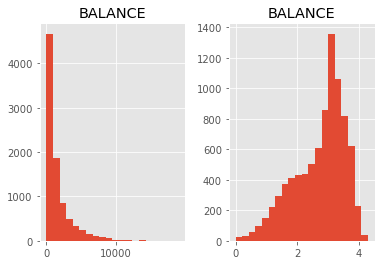

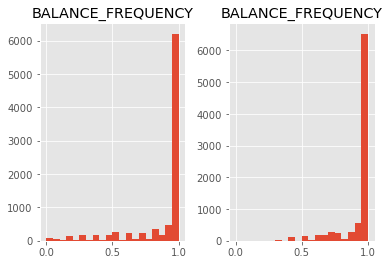

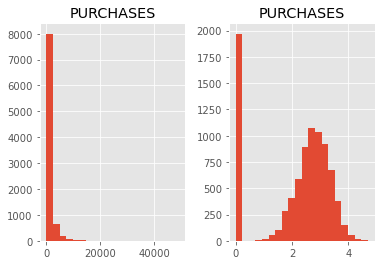

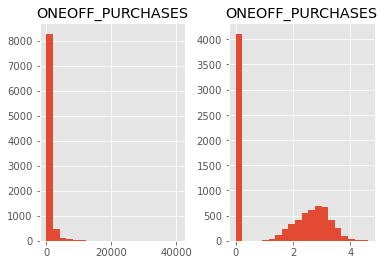

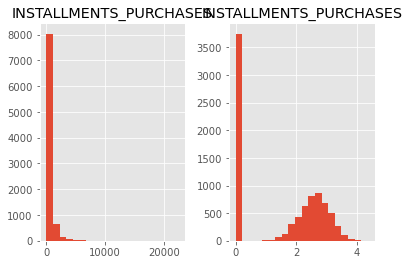

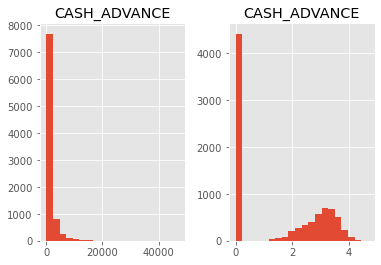

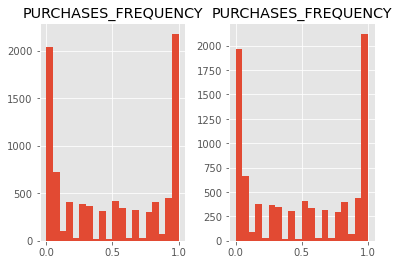

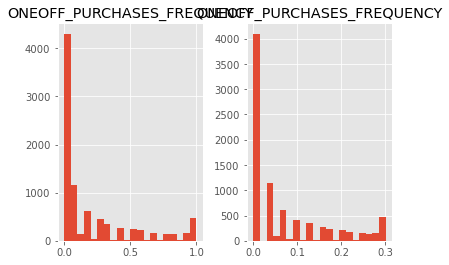

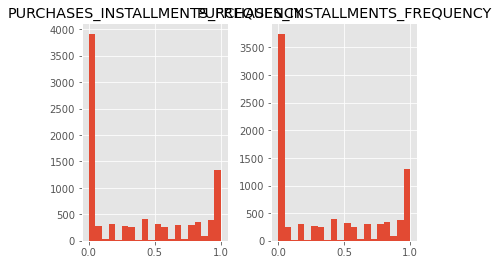

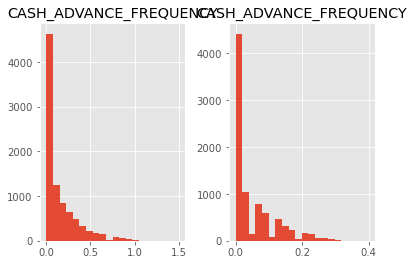

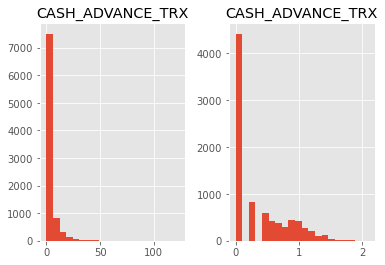

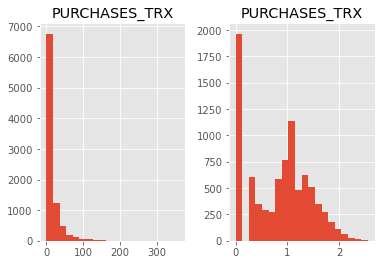

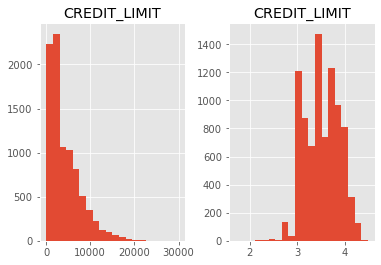

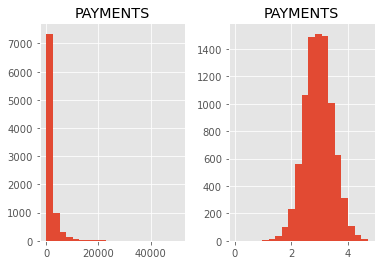

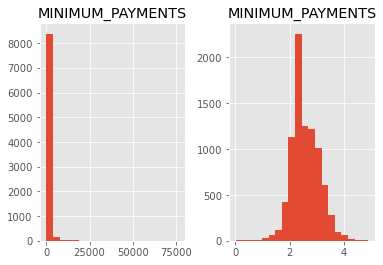

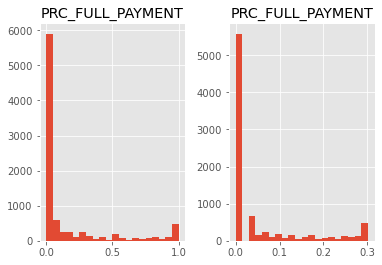

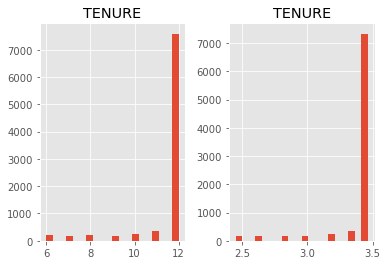

In [214]:
for i in df.columns:
    print(i,"Skewness original: ",df[i].skew(), "New Skewness: ",X[i].skew())
    fig, axes = plt.subplots(1, 2)
    df.hist(i, bins=20, ax=axes[0])
    X.hist(i, bins=20, ax=axes[1])

##### Normalization

In [215]:
# Get a copy of the dataframe before normalization
X_beforeNorm = X.copy(deep=True)


# Normalize all columns
cols = list(X.columns) # save the name of the columns
X_array = X.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_array)
X = pd.DataFrame(X_scaled, columns=cols)

In [216]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8622.0,0.635945,0.192334,0.0,0.508167,0.692319,0.776614,1.0
BALANCE_FREQUENCY,8622.0,0.936567,0.134216,0.0,0.953463,1.000000,1.000000,1.0
PURCHASES,8622.0,0.456327,0.270701,0.0,0.350926,0.549073,0.652329,1.0
ONEOFF_PURCHASES,8622.0,0.305662,0.306404,0.0,0.000000,0.361987,0.602759,1.0
INSTALLMENTS_PURCHASES,8622.0,0.337650,0.308475,0.0,0.000000,0.454608,0.616345,1.0
CASH_ADVANCE,8622.0,0.311546,0.331897,0.0,0.000000,0.000000,0.653763,1.0
PURCHASES_FREQUENCY,8622.0,0.495873,0.401313,0.0,0.083333,0.500000,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8622.0,0.233116,0.314470,0.0,0.000000,0.115477,0.415037,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8622.0,0.368502,0.398093,0.0,0.000000,0.166667,0.750000,1.0
CASH_ADVANCE_FREQUENCY,8622.0,0.126164,0.172434,0.0,0.000000,0.000000,0.243529,1.0


### Modeling

* Correlations

In [217]:
dataCorr = X.corr()
dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))

correlation_mat = dataCorr

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.75 ]

strong_pairs2 = sorted_pairs[abs(sorted_pairs) < -0.75 ]

print(strong_pairs, strong_pairs2)

PURCHASES_TRX                     PURCHASES_INSTALLMENTS_FREQUENCY    0.758462
                                  INSTALLMENTS_PURCHASES              0.783310
RATIO_INSTALLMENTS_PURCHASES      INSTALLMENTS_PURCHASES              0.785725
PURCHASES_FREQUENCY               PURCHASES                           0.785971
CASH_ADVANCE_TRX_MONTH            CASH_ADVANCE                        0.793545
AVG_MONTH_PURCHASES               PURCHASES_FREQUENCY                 0.794924
PURCHASES_TRX_MONTH               PURCHASES                           0.795690
PURCHASES_FREQUENCY               INSTALLMENTS_PURCHASES              0.796817
ONEOFF_PURCHASES_FREQUENCY        ONEOFF_PURCHASES                    0.815716
FREQ                              PURCHASES_TRX                       0.816278
CASH_ADVANCE_FREQUENCY            CASH_ADVANCE                        0.816298
MINIMUM_PAYMENTS                  BALANCE                             0.816983
PURCHASES_TRX_MONTH               AVG_MONTH_PURCHASE

###### PCA Funciona Bem com variáveis correlacionadas

In [218]:
#dropped = ['BALANCE_FREQUENCY', 'PURCHASES_TRX','ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY', 'Fee_Applied?', 
           #'PURCHASES_FREQUENCY', 'BALANCE', 'CASH_ADVANCE', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX']

In [219]:
#Dropped porque é binária e pode ganhar maior preponderância na definição das componentes

dropped = ['Fee_Applied?']

In [220]:
X.drop(dropped, axis = 1, inplace = True)

#### Method 1 - WITH PCA

#### Analyze Principal Components

(8622, 2)


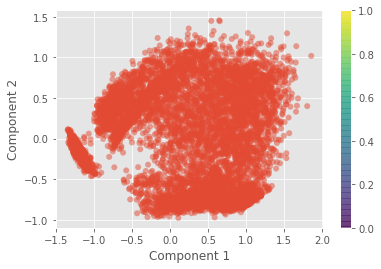

In [221]:
# Let'start to visualizar with only two components
pca2 = PCA(n_components = 2)
pca2.fit(X)
X_pca2 = pca2.transform(X) # Apply the dimension reduction to the dataset
print(X_pca2.shape)

# Plot a scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

In [222]:
# Fit the PCA algorithm to data 
pca = PCA().fit(X)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(X.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.464811,0.464811
1,2,0.182930,0.647741
2,3,0.142242,0.789983
3,4,0.055768,0.845751
4,5,0.030478,0.876230
5,6,0.028589,0.904819
6,7,0.018150,0.922969
7,8,0.015720,0.938689
8,9,0.013568,0.952257
9,10,0.009819,0.962076


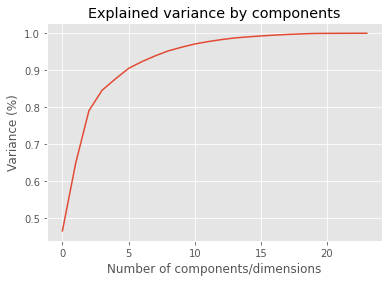

In [223]:
# Plot the cumulative explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance (%)')
plt.title('Explained variance by components')
plt.show()

### Modeling - K-Means

In [224]:
# Apply the dimension reduction to the dataset (for 9 components)
pca_reduced = PCA(n_components = 8)
pca_reduced.fit(X)
X_pca_reduced = pca_reduced.transform(X) 
print(X_pca_reduced.shape)

(8622, 8)


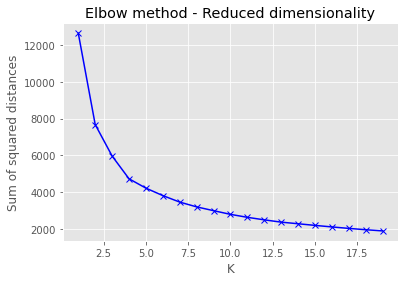

In [225]:
# Select K based on the sum of squared distances
ssd = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=123)
    km = km.fit(X_pca_reduced)
    ssd.append(km.inertia_)
    
# Plot results
plt.plot(K, ssd, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method - Reduced dimensionality')
plt.show()

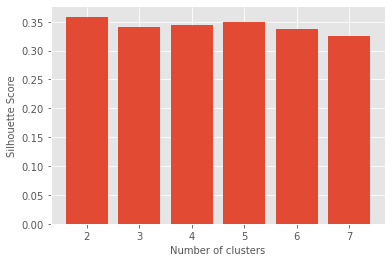

In [226]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

scores_pca = X_pca_reduced

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(scores_pca, KMeans(n_clusters = n_cluster).fit_predict(scores_pca))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [227]:
# Apply the K-Means for K=4
K=4
kmeans = KMeans(n_clusters=K, random_state=123)
kmeans.fit(X_pca_reduced)
y_kmeans = kmeans.predict(X_pca_reduced)

In [228]:
# Count observations per cluster
X_beforeNorm.groupby(y_kmeans).size()

0    2448
1    1956
2    1720
3    2498
dtype: int64

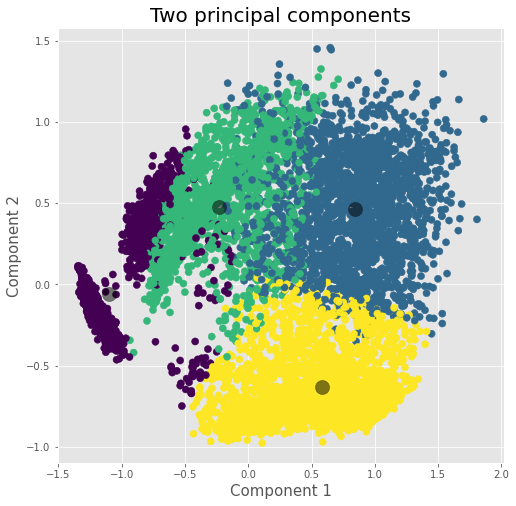

In [229]:
# Plot results two principal components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Two principal components', fontsize = 20)
ax.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [230]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=X.columns)
wheightsDF

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,FREQ,MON,AVG_MONTH_SPENDING,AVG_MONTH_PURCHASES,RATIO_INSTALLMENTS_PURCHASES,CASH_ADVANCE_TRX_MONTH,PURCHASES_TRX_MONTH
0,-0.048677,0.018420,0.272795,0.137992,0.325450,-0.224865,0.444661,0.158509,0.411944,-0.095150,...,-0.015318,0.138285,0.025200,0.133565,0.022479,0.027127,0.251791,0.341535,-0.073787,0.197498
1,0.145499,0.052683,0.167242,0.491150,-0.120663,0.083807,0.071408,0.482967,-0.174001,0.049543,...,0.046207,-0.073231,0.031220,0.127821,-0.063326,0.137269,0.175417,-0.534989,0.043426,0.120686
2,0.246155,0.106699,-0.052532,-0.088937,0.147691,0.524499,0.093659,-0.060650,0.223383,0.262329,...,0.119570,-0.175852,-0.013640,0.169595,0.418572,0.204073,-0.028324,0.110165,0.226411,0.062935
3,-0.212226,-0.080816,-0.068385,-0.050170,-0.034723,0.142023,0.011425,0.097540,-0.056958,0.084290,...,-0.106182,0.895475,-0.118957,0.052268,0.157283,0.107251,-0.043531,-0.089973,0.075478,-0.001960
4,-0.125006,-0.050956,0.010853,0.017893,-0.083980,0.068362,0.199908,0.069697,0.056937,0.084692,...,-0.111811,-0.158228,-0.894412,-0.036698,-0.081012,-0.050254,-0.008067,-0.021919,0.024971,-0.033518
5,-0.068794,-0.207569,0.428435,0.270776,0.139284,0.105869,-0.333067,-0.166423,-0.411216,0.106117,...,-0.016764,0.001628,-0.094084,-0.083484,-0.017699,0.074882,0.344929,0.405289,0.105464,-0.095662
6,0.390148,0.155706,-0.014535,0.092028,0.224860,-0.171876,-0.283634,-0.187728,0.069557,-0.241585,...,0.146365,0.106734,-0.351269,-0.084274,0.321656,0.219829,0.050169,-0.161842,-0.238664,-0.014683
7,-0.437741,-0.459980,-0.048263,0.262172,0.194257,0.090401,-0.191765,-0.170577,0.346883,-0.071606,...,-0.272929,-0.180204,0.098140,-0.003981,0.257323,0.043554,-0.018962,-0.307464,-0.052416,0.029561
8,-0.107402,-0.189454,-0.208810,-0.220402,0.248643,-0.000880,-0.086308,0.603934,-0.364219,-0.118850,...,-0.086650,-0.176757,-0.042324,0.053970,0.308376,0.011379,-0.170917,0.234003,-0.116797,0.099731
9,0.016397,-0.082656,-0.132084,-0.024270,0.125863,-0.584592,-0.281073,-0.029234,0.071179,0.323694,...,0.029123,-0.025158,-0.123462,0.402531,-0.099324,-0.026547,-0.101581,-0.041371,0.333414,0.148239


In [232]:
# Study the weights of components
comp = abs(wheightsDF.iloc[5])  ## id 14 is component 14
comp = comp.sort_values(ascending=False)
comp

PURCHASES                           0.428435
PURCHASES_INSTALLMENTS_FREQUENCY    0.411216
RATIO_INSTALLMENTS_PURCHASES        0.405289
AVG_MONTH_PURCHASES                 0.344929
PURCHASES_FREQUENCY                 0.333067
ONEOFF_PURCHASES                    0.270776
BALANCE_FREQUENCY                   0.207569
ONEOFF_PURCHASES_FREQUENCY          0.166423
INSTALLMENTS_PURCHASES              0.139284
CASH_ADVANCE_TRX                    0.120569
CASH_ADVANCE_FREQUENCY              0.106117
CASH_ADVANCE                        0.105869
CASH_ADVANCE_TRX_MONTH              0.105464
PURCHASES_TRX_MONTH                 0.095662
TENURE                              0.094084
FREQ                                0.083484
AVG_MONTH_SPENDING                  0.074882
BALANCE                             0.068794
CREDIT_LIMIT                        0.062066
PAYMENTS                            0.037748
PURCHASES_TRX                       0.018945
MON                                 0.017699
MINIMUM_PA

In [236]:
# Check the mean values of each cluster for top 30 relevant featureslen()
#top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(XPrelog[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

,0,1,2,3
BALANCE,2324.946643,2210.675151,1069.888094,781.992021
BALANCE_FREQUENCY,0.910356,0.975432,0.837599,0.857083
PURCHASES,43.565139,2943.416467,888.232953,582.027298
ONEOFF_PURCHASES,41.196275,1836.434678,859.251320,21.257742
INSTALLMENTS_PURCHASES,2.383047,1106.981789,29.230401,560.778451
CASH_ADVANCE,2177.581069,998.973573,285.322596,322.405841
PURCHASES_FREQUENCY,0.028965,0.898140,0.388247,0.712556
ONEOFF_PURCHASES_FREQUENCY,0.024312,0.540915,0.356159,0.019252
PURCHASES_INSTALLMENTS_FREQUENCY,0.004460,0.729711,0.041097,0.667855
CASH_ADVANCE_FREQUENCY,0.295783,0.130821,0.054720,0.045477


In [237]:
# Check the mean values of each cluster for top 30 relevant featureslen()
#top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(XPrelog.groupby(y_kmeans).mean())
clustersMeanDF.transpose()

,0,1,2,3
BALANCE,2324.946643,2210.675151,1069.888094,781.992021
BALANCE_FREQUENCY,0.910356,0.975432,0.837599,0.857083
PURCHASES,43.565139,2943.416467,888.232953,582.027298
ONEOFF_PURCHASES,41.196275,1836.434678,859.251320,21.257742
INSTALLMENTS_PURCHASES,2.383047,1106.981789,29.230401,560.778451
CASH_ADVANCE,2177.581069,998.973573,285.322596,322.405841
PURCHASES_FREQUENCY,0.028965,0.898140,0.388247,0.712556
ONEOFF_PURCHASES_FREQUENCY,0.024312,0.540915,0.356159,0.019252
PURCHASES_INSTALLMENTS_FREQUENCY,0.004460,0.729711,0.041097,0.667855
CASH_ADVANCE_FREQUENCY,0.295783,0.130821,0.054720,0.045477


#### Method 2 - WITHOUT PCA

In [72]:
#Variables that are correlated

print(strong_pairs, strong_pairs2)

PURCHASES_TRX                     PURCHASES_INSTALLMENTS_FREQUENCY    0.758462
                                  INSTALLMENTS_PURCHASES              0.783310
RATIO_INSTALLMENTS_PURCHASES      INSTALLMENTS_PURCHASES              0.785725
PURCHASES_FREQUENCY               PURCHASES                           0.785971
CASH_ADVANCE_TRX_MONTH            CASH_ADVANCE                        0.793545
AVG_MONTH_PURCHASES               PURCHASES_FREQUENCY                 0.794924
PURCHASES_TRX_MONTH               PURCHASES                           0.795690
PURCHASES_FREQUENCY               INSTALLMENTS_PURCHASES              0.796817
ONEOFF_PURCHASES_FREQUENCY        ONEOFF_PURCHASES                    0.815716
FREQ                              PURCHASES_TRX                       0.816278
CASH_ADVANCE_FREQUENCY            CASH_ADVANCE                        0.816298
MINIMUM_PAYMENTS                  BALANCE                             0.816983
PURCHASES_TRX_MONTH               AVG_MONTH_PURCHASE

##### Drop Columns not to be used

In [73]:
#dropped = ['BALANCE_FREQUENCY','PURCHASES_TRX','ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY', 
           #'PURCHASES_FREQUENCY', 'BALANCE', 'CASH_ADVANCE', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX']

In [74]:
#Prioridade das variáveis a manter de acordo com os resultados da PCA - mantemos as que mantêm maior variabilidade
#fazemos drop das que estão correlacionadas com elas

In [75]:
dropped = ['AVG_MONTH_PURCHASES','CASH_ADVANCE_TRX_MONTH','PURCHASES_TRX_MONTH','CASH_ADVANCE_FREQUENCY',
           'PURCHASES_TRX', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'BALANCE', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
          'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE', 'RATIO_INSTALLMENTS_PURCHASES']

In [76]:
X.drop(dropped, axis = 1, inplace = True)

In [77]:
# Ver se escapou alguma

dataCorr = X.corr()
dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))

correlation_mat = dataCorr

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.75 ]

strong_pairs2 = sorted_pairs[abs(sorted_pairs) < -0.75 ]

print(strong_pairs, strong_pairs2)

Series([], dtype: float64) Series([], dtype: float64)


In [78]:
df_clustered = XPrelog.copy()

df_scaled = X

from sklearn.cluster import KMeans

nr_clusters = 25
sse = []

for k in range(1, nr_clusters + 1):
    kmeans_model = KMeans(n_clusters = k, random_state = 123)
    kmeans_model.fit(df_scaled)
    sse.append(kmeans_model.inertia_)

In [79]:
df_sse = pd.DataFrame({'nr_clusters': range(1, nr_clusters + 1), 'sse': sse})
df_sse.head()

,nr_clusters,sse
0,1,5244.500989
1,2,3947.578172
2,3,3248.812350
3,4,2651.559233
4,5,2265.213920


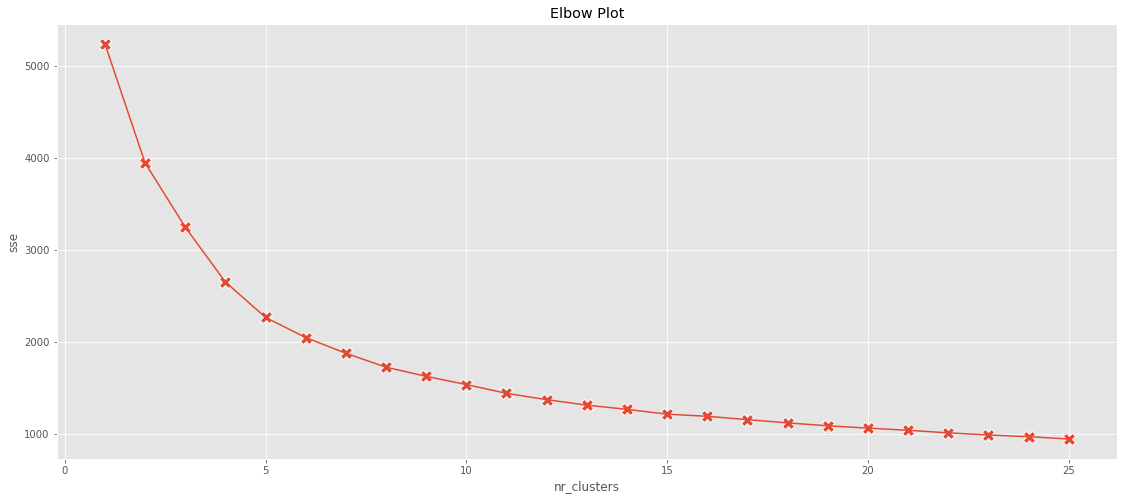

In [80]:
plt.figure(figsize = (19, 8))
sns.lineplot(data = df_sse, x = 'nr_clusters', y = 'sse')
sns.scatterplot(data = df_sse, x = 'nr_clusters', y = 'sse', marker = 'X', s = 150)
plt.title('Elbow Plot')
plt.show()

In [81]:
range_n_clusters = list (range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.24876431710511235)
For n_clusters = 3, silhouette score is 0.2750397653151135)
For n_clusters = 4, silhouette score is 0.30319188879528014)
For n_clusters = 5, silhouette score is 0.30656175147105275)
For n_clusters = 6, silhouette score is 0.31251422721768607)
For n_clusters = 7, silhouette score is 0.321711175589514)
For n_clusters = 8, silhouette score is 0.3256499980354023)
For n_clusters = 9, silhouette score is 0.3044131897488303)


In [82]:
# Cluster

nr_clusters = 5

kmeans_model = KMeans(n_clusters = nr_clusters, random_state = 123)
kmeans_model.fit(df_scaled)
y_kmeans = kmeans_model.predict(df_scaled)

In [83]:
# Count observations per cluster
X_beforeNorm.groupby(y_kmeans).size()

0    2156
1    1713
2    2394
3    1188
4    1171
dtype: int64

In [84]:
print(kmeans_model.inertia_)

2265.2139197873216


In [85]:
df_clustered['cluster_kmeans'] = kmeans_model.labels_+1

In [86]:
centroids_kmeans = df_clustered.groupby('cluster_kmeans').mean()
centroids_kmeans.transpose()

cluster_kmeans,1,2,3,4,5
BALANCE,2228.988548,1001.683833,2498.456258,187.829955,924.973173
BALANCE_FREQUENCY,0.909480,0.864199,0.965496,0.850163,0.816018
PURCHASES,6.918576,483.465108,2052.112297,1877.663535,733.664936
ONEOFF_PURCHASES,6.573794,5.925855,1294.664812,1045.909428,732.396900
INSTALLMENTS_PURCHASES,0.360886,477.539253,757.477235,831.754108,1.591588
CASH_ADVANCE,2047.655633,389.814382,1395.250968,83.629189,50.175532
PURCHASES_FREQUENCY,0.012421,0.672187,0.742325,0.797443,0.318269
ONEOFF_PURCHASES_FREQUENCY,0.010446,0.010084,0.421456,0.306715,0.311774
PURCHASES_INSTALLMENTS_FREQUENCY,0.001612,0.633548,0.554769,0.632363,0.007782
CASH_ADVANCE_FREQUENCY,0.285211,0.058044,0.180297,0.011819,0.023627


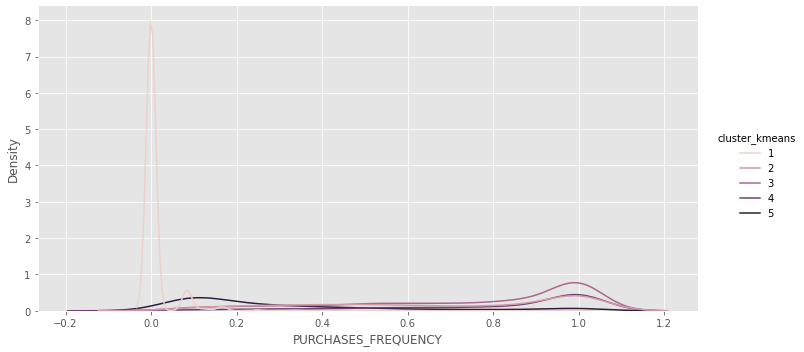

In [87]:
sns.displot(data=df_clustered, x="PURCHASES_FREQUENCY", hue="cluster_kmeans",aspect = 2, kind="kde")

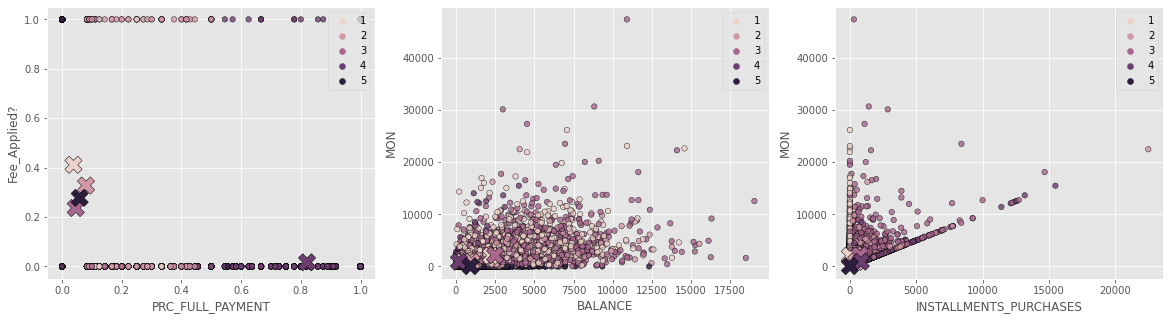

In [88]:
def plot_scatter_cluster(data, centroids, x, y, hue, ax):
    sns.scatterplot(data = data, x = x, y = y, hue = hue,s = 30, linewidth = .5,  edgecolor = 'black', alpha = .8,ax = ax)
    sns.scatterplot(data = centroids, x = x, y = y, hue = hue,s = 300, marker = 'X', linewidth = .5,  edgecolor = 'black',legend = False, ax = ax)
    ax.legend(loc = 'upper right')
    

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
plot_scatter_cluster(data = df_clustered, centroids = centroids_kmeans, x = 'PRC_FULL_PAYMENT', y = 'Fee_Applied?', hue = 'cluster_kmeans', ax = ax[0])
plot_scatter_cluster(data = df_clustered, centroids = centroids_kmeans, x = 'BALANCE', y = 'MON', hue = 'cluster_kmeans', ax = ax[1])
plot_scatter_cluster(data = df_clustered, centroids = centroids_kmeans, x = 'INSTALLMENTS_PURCHASES', y = 'MON', hue = 'cluster_kmeans', ax = ax[2])
plt.show()